In [1]:
import torch
import os
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../utils/')
import FigureConfig as FC

In [2]:
alpha = torch.linspace(0,1,50)

In [3]:
result = torch.load('result.matrix')
result.shape

torch.Size([13, 10, 50, 6])

In [4]:
K = 3  # for example

result_selected = torch.zeros([13,K,50,6])

for gamma in range(50):
    re_temp = result[:,:,gamma,:]
    valid_acc_data = re_temp[:,:,0]

    # Obtain the top K validation accuracies and their indices for each row
    top_k_values, top_k_seeds = torch.topk(valid_acc_data, K, dim=1)

    # Initialize the tensor to hold the best K results for each row
    best_data_k = torch.zeros(valid_acc_data.size(0), K, re_temp.size(2))

    # Populate best_data_k using the top K seeds
    for i in range(valid_acc_data.size(0)):
        for j in range(K):
            best_data_k[i, j] = re_temp[i, top_k_seeds[i, j]]

    result_selected[:,:,gamma,:] = best_data_k

In [5]:
result_table = result_selected.clone()
mean_acc_0 = result_table[:,:,0,3].mean(1)
mean_power_0 = result_table[:,:,0,4].mean(1)
mean_area_0 = result_table[:,:,0,5].mean(1)

mean_acc_25 = result_table[:,:,12,3].mean(1)
mean_power_25 = result_table[:,:,12,4].mean(1)
mean_area_25 = result_table[:,:,12,5].mean(1)

mean_acc_50 = result_table[:,:,25,3].mean(1)
mean_power_50 = result_table[:,:,25,4].mean(1)
mean_area_50 = result_table[:,:,25,5].mean(1)

mean_acc_75 = result_table[:,:,37,3].mean(1)
mean_power_75 = result_table[:,:,37,4].mean(1)
mean_area_75 = result_table[:,:,37,5].mean(1)

mean_acc_100 = result_table[:,:,49,3].mean(1)
mean_power_100 = result_table[:,:,49,4].mean(1)
mean_area_100 = result_table[:,:,49,5].mean(1)

std_acc_0 = result_table[:,:,0,3].std(1)
std_power_0 = result_table[:,:,0,4].std(1)
std_area_0 = result_table[:,:,0,5].std(1)

std_acc_25 = result_table[:,:,12,3].std(1)
std_power_25 = result_table[:,:,12,4].std(1)
std_area_25 = result_table[:,:,12,5].std(1)

std_acc_50 = result_table[:,:,25,3].std(1)
std_power_50 = result_table[:,:,25,4].std(1)
std_area_50 = result_table[:,:,25,5].std(1)

std_acc_75 = result_table[:,:,37,3].std(1)
std_power_75 = result_table[:,:,37,4].std(1)
std_area_75 = result_table[:,:,37,5].std(1)

std_acc_100 = result_table[:,:,49,3].std(1)
std_power_100 = result_table[:,:,49,4].std(1)
std_area_100 = result_table[:,:,49,5].std(1)

In [6]:
table = torch.stack([mean_acc_0*100, std_acc_0*100, mean_power_0*1000, std_power_0*1000, mean_area_0, std_area_0,
                     mean_acc_25*100, std_acc_25*100, mean_power_25*1000, std_power_25*1000, mean_area_25, std_area_25,
                     mean_acc_50*100, std_acc_50*100, mean_power_50*1000, std_power_50*1000, mean_area_50, std_area_50,
                     mean_acc_75*100, std_acc_75*100, mean_power_75*1000, std_power_75*1000, mean_area_75, std_area_75,
                     mean_acc_100*100, std_acc_100*100, mean_power_100*1000, std_power_100*1000, mean_area_100, std_area_100]).T
table = table.detach().numpy()
np.savetxt('resut_table.txt', table, delimiter='\t', fmt='%0.5f')

# figure

In [7]:
result_seed_mean = result.mean(1)[:,:,3:]
result_seed_mean.shape

torch.Size([13, 50, 3])

In [8]:
for ds in range(13):
    result_seed_mean[ds,:,0] = result_seed_mean[ds,:,0] / result_seed_mean[ds,0,0]
    result_seed_mean[ds,:,1] = result_seed_mean[ds,:,1] / result_seed_mean[ds,0,1]
    result_seed_mean[ds,:,2] = result_seed_mean[ds,:,2] / result_seed_mean[ds,0,2]

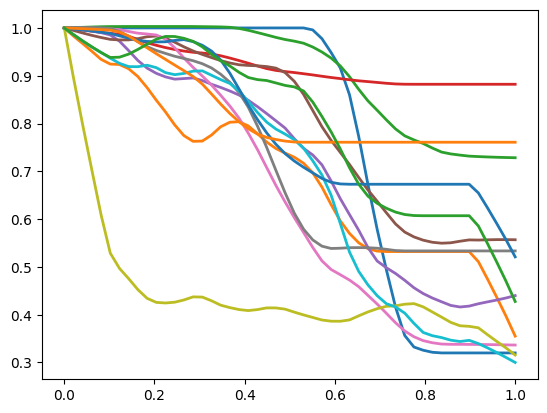

In [9]:
for ds in range(13):
    plt.plot(alpha, result_seed_mean[ds,:,0], lw=2, label=f'{ds}')
# plt.xlim([0,1])
# plt.ylim([0.3,1.05])
# plt.axis('off')
plt.savefig("../figures/pruning_single_acc.pdf", format='pdf', bbox_inches='tight', transparent=True)

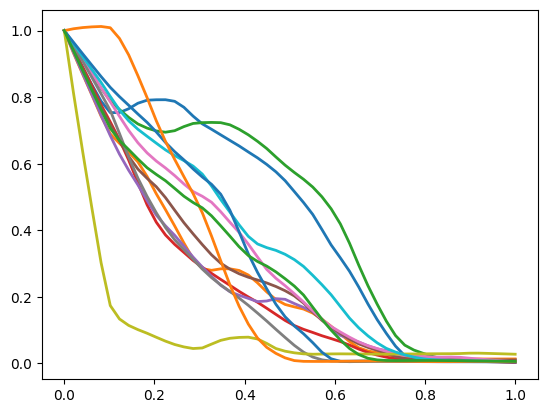

In [10]:
for ds in range(13):
    plt.plot(alpha, result_seed_mean[ds,:,1], lw=2)
# plt.xlim([0,1])
# plt.ylim([0,1])
# plt.axis('off')
plt.savefig("../figures/pruning_single_power.pdf", format='pdf', bbox_inches='tight', transparent=True)

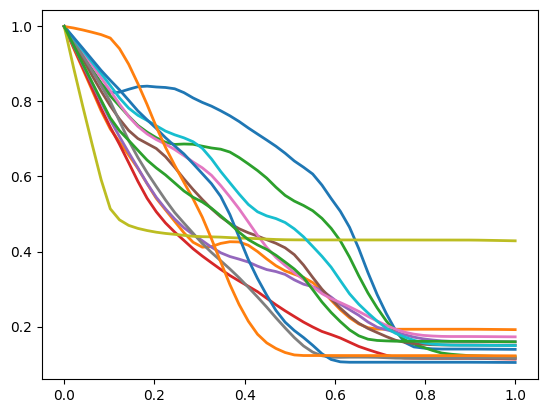

In [11]:
for ds in range(13):
    plt.plot(alpha, result_seed_mean[ds,:,2], lw=2)
# plt.xlim([0,1])
# plt.ylim([0,1])
# plt.axis('off')
plt.savefig("../figures/pruning_single_area.pdf", format='pdf', bbox_inches='tight', transparent=True)

# analysis

In [12]:
result.shape

torch.Size([13, 10, 50, 6])

In [13]:
result_ds_mean = result.mean(0)[:,:,3:]
result_ds_mean.shape

torch.Size([10, 50, 3])

In [14]:
summary_mean = result_ds_mean.mean(0)
summary_std  = result_ds_mean.std(0)
summary_mean.shape, summary_std.shape

(torch.Size([50, 3]), torch.Size([50, 3]))

In [36]:
acc_factor = summary_mean[0,0]
mean_acc = summary_mean[:,0] / acc_factor
std_acc = summary_std[:,0] / acc_factor * 4

power_factor = summary_mean[0,1]
mean_power = summary_mean[:,1]
std_power = summary_std[:,1]

area_factor = summary_mean[0,2]
mean_area= summary_mean[:,2] / area_factor
std_area = summary_std[:,2] / area_factor * 4

acc_factor, power_factor, area_factor

(tensor(0.8558), tensor(0.0665), tensor(568.0787))

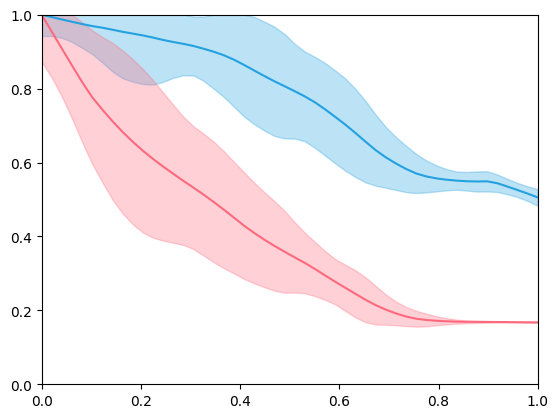

In [16]:
# draw std
plt.fill_between(alpha, mean_acc-std_acc, np.where(mean_acc+std_acc < 1, mean_acc+std_acc, 1), alpha=0.3, color=FC.Cyan);
plt.fill_between(alpha, mean_area-std_area, np.where(mean_area+std_area < 1, mean_area+std_area, 1), alpha=0.3, color=FC.Pink);
# draw mean
plt.plot(alpha, mean_acc, color=FC.Cyan);
plt.plot(alpha, mean_area, color=FC.Pink);

plt.xlim([0,1])
plt.ylim([0,1])
# plt.axis('off')
plt.savefig("../figures/pruning_area_acc.pdf", format='pdf', bbox_inches='tight', transparent=True)

In [17]:
torch.save(mean_acc, './pruning_mean_acc.matrix')
torch.save(std_acc, './pruning_std_acc.matrix')
torch.save(mean_area, './pruning_mean_area.matrix')
torch.save(std_area, './pruning_std_area.matrix')

In [26]:
pruning_mean_acc = torch.load('./pruning_mean_acc.matrix')
pruning_std_acc = torch.load('./pruning_std_acc.matrix')
pruning_mean_area = torch.load('./pruning_mean_area.matrix')
pruning_std_area = torch.load('./pruning_std_area.matrix')
ea_mean_acc = torch.load('../AreaAwareNEAT/ea_mean_acc.matrix')
ea_std_acc = torch.load('../AreaAwareNEAT/ea_std_acc.matrix')
ea_mean_area = torch.load('../AreaAwareNEAT/ea_mean_area.matrix')
ea_std_area = torch.load('../AreaAwareNEAT/ea_std_area.matrix')

(0.0, 1.0)

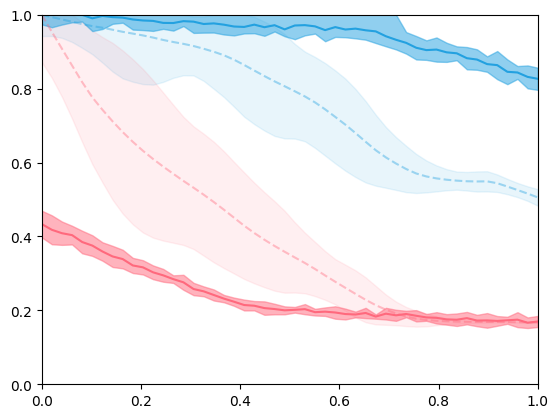

In [33]:
# draw std
plt.fill_between(alpha, pruning_mean_acc-pruning_std_acc, np.where(pruning_mean_acc+pruning_std_acc < 1, pruning_mean_acc+pruning_std_acc, 1), alpha=0.1, color=FC.Cyan);
plt.fill_between(alpha, pruning_mean_area-pruning_std_area, np.where(pruning_mean_area+pruning_std_area < 1, pruning_mean_area+pruning_std_area, 1), alpha=0.1, color=FC.Pink);
# draw mean
plt.plot(alpha, pruning_mean_acc, '--', alpha=0.4, color=FC.Cyan);
plt.plot(alpha, pruning_mean_area, '--', alpha=0.4, color=FC.Pink);

# draw std
plt.fill_between(alpha, ea_mean_acc-ea_std_acc, np.where(ea_mean_acc+pruning_std_acc < 1, ea_mean_acc+ea_std_acc, 1), alpha=0.5, color=FC.Cyan);
plt.fill_between(alpha, ea_mean_area-ea_std_area, np.where(ea_mean_area+pruning_std_area < 1, ea_mean_area+ea_std_area, 1), alpha=0.5, color=FC.Pink);
# draw mean
plt.plot(alpha, ea_mean_acc, color=FC.Cyan);
plt.plot(alpha, ea_mean_area, color=FC.Pink);

plt.xlim([0,1])
plt.ylim([0,1])
# plt.axis('off')
# plt.savefig("../figures/pruningvsneat.pdf", format='pdf', bbox_inches='tight', transparent=True)

In [37]:
acc_points = result_ds_mean[:,:,0] / acc_factor
power_points = result_ds_mean[:,:,1]
area_points = result_ds_mean[:,:,2] / area_factor
area_points.min()

tensor(0.1669)

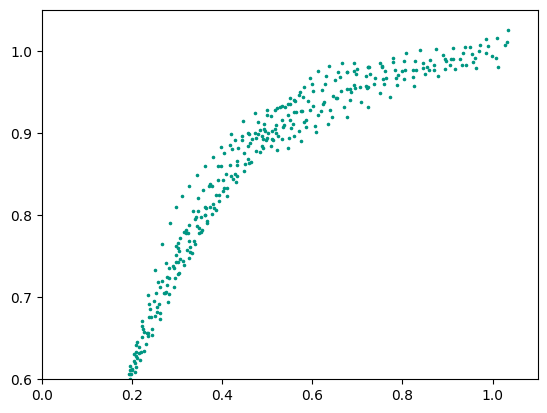

In [21]:
plt.scatter(area_points.flatten(), acc_points.flatten(), color=FC.Green, s=2.5)
plt.xlim([0,1.1])
plt.ylim([0.6,1.05])
# plt.axis('off')
plt.savefig("../figures/pruning_points_area_acc.pdf", format='pdf', bbox_inches='tight', transparent=True)

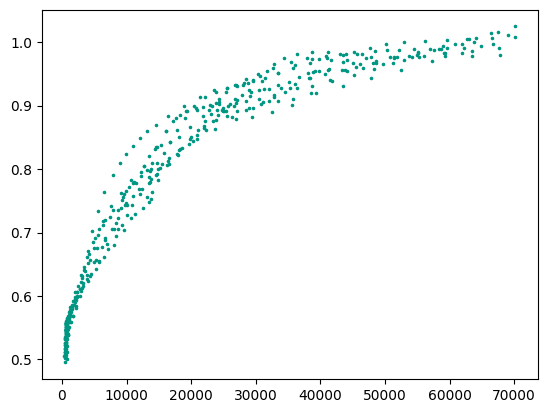

In [39]:
plt.scatter(power_points.flatten()*1000000, acc_points.flatten(), color=FC.Green, s=2.5)
# plt.xlim([0,1.1])
# plt.ylim([0.6,1.05])
# plt.axis('off')
plt.savefig("../figures/pruning_points_power_acc.pdf", format='pdf', bbox_inches='tight', transparent=True)

In [23]:
torch.save(area_points.flatten(), './pruning_area_points.matrx')
torch.save(acc_points.flatten(), './pruning_acc_points.matrx')

# EA vs. pruning

In [30]:
neat_area_points = torch.load('../AreaAwareNEAT/neat_area_points.matrx')
neat_acc_points = torch.load('../AreaAwareNEAT/neat_acc_points.matrx')
pruning_area_points = torch.load('./pruning_area_points.matrx')
pruning_acc_points = torch.load('./pruning_acc_points.matrx')


m = max(neat_acc_points.max(), pruning_acc_points.max())

(0.45, 1.05)

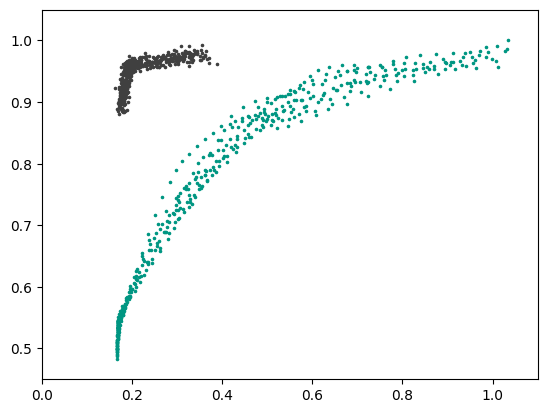

In [35]:
plt.scatter(neat_area_points, neat_acc_points/m, color=FC.Black, s=2.5)
plt.scatter(pruning_area_points, pruning_acc_points/m, color=FC.Green, s=2.5)
plt.xlim([0,1.1])
plt.ylim([0.45,1.05])
# plt.axis('off')
# plt.savefig("../figures/pareto.pdf", format='pdf', bbox_inches='tight', transparent=True)